# Q-Learning in Python

This notebook demonstrates how to implement Q-Learning using OpenAI Gym and NumPy.

# **Step 1: Import Libraries**

In [13]:
import numpy as np
import gymnasium as gym

# **Step 2: Initialize Environment and Q-Table**

In [14]:
# Create FrozenLake environment
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode=None)
n_states = env.observation_space.n
n_actions = env.action_space.n

In [15]:
# Initialize Q-table with zeros
Q_table = np.zeros((n_states, n_actions))

# **Step 3: Define Q-Learning Parameters**

In [16]:
# Hyperparameters
learning_rate = 0.1
discount_factor = 0.99
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01
num_episodes = 1000
max_steps = 100

# **Step 4: Implement Q-Learning Algorithm**

In [17]:
rewards = []
for episode in range(num_episodes):
    state, _ = env.reset()
    total_reward = 0
    for step in range(max_steps):
        # Choose action (epsilon-greedy)
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q_table[state, :])  # Exploit
        
        # Take action
        new_state, reward, done, _, _ = env.step(action)
        
        # Update Q-table
        Q_table[state, action] = (1 - learning_rate) * Q_table[state, action] + \
                                 learning_rate * (reward + discount_factor * np.max(Q_table[new_state, :]))

        state = new_state
        total_reward += reward
        if done:
            break

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards.append(total_reward)

print(f"Success Rate: {sum(rewards) / num_episodes:.2f}")

Success Rate: 0.77


# **Step 5: Evaluate the Q-Learning Agent**

In [18]:
success_rate = sum(rewards) / num_episodes
print(f"Success Rate: {success_rate:.2f}")

Success Rate: 0.77


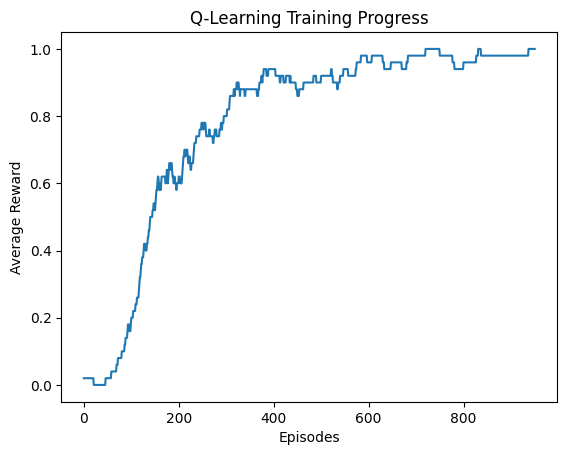

In [19]:
import matplotlib.pyplot as plt

plt.plot(np.convolve(rewards, np.ones(50)/50, mode='valid'))
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Q-Learning Training Progress")
plt.show()

## Next Steps
- Try different values for hyperparameters like `learning_rate` and `discount_factor`.
- Experiment with a slippery version of FrozenLake (`is_slippery=True`).
- Implement a Deep Q-Network (DQN) instead of a table-based Q-learning.